# Overview:

#### Aim: Predicting customer expenditure using customer information ([Source of dataset (Kaggle)](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis))
#### What we going to do in this notebook:
1. Apply Poisson Regression on the following splitted datasets:
- train_data_pr.csv
- test_data_pr.csv
2. Predicting all the response variables ([TotalPurchase](#TotalPurchase), [MntGroceryProducts](#MntGroceryProducts), [MntWines](#MntWines), [MntGoldProds](#MntGoldProds)) using Poisson Regression
3. Find out which of the following variables are the best / worst predictors:
- Categorical:
    - Education
    - Marital_Status
    - HaveChild
    - YearRange
- Numerical:
    - Income
    - TotalChild
    - NumWebVisitsMonth

# Introduction

## Importing Libraries 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [4]:
customerData = pd.read_csv('dataset\customerData_Clean.csv')

## Showing the data

In [5]:
customerData

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,0,1957,Graduation,Single,58138.0,0,0,58,635,88,...,8,10,4,7,806,25,1,1950,0,0
1,1,1954,Graduation,Single,46344.0,1,1,38,11,1,...,1,1,2,5,9,6,0,1950,2,1
2,2,1965,Graduation,Married,71613.0,0,0,26,426,49,...,8,2,10,4,287,21,0,1960,0,0
3,3,1984,Graduation,Married,26646.0,1,0,26,11,4,...,2,0,4,6,34,8,0,1980,1,1
4,4,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,3,6,5,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,2161,1967,Graduation,Married,61223.0,0,1,46,709,43,...,9,3,4,5,267,18,0,1960,1,1
2162,2162,1946,PhD,Married,64014.0,2,1,56,406,0,...,8,2,5,7,30,22,1,1940,3,1
2163,2163,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,2,3,13,6,297,19,1,1980,0,0
2164,2164,1956,Master,Married,69245.0,0,1,8,428,30,...,6,5,10,3,324,23,0,1950,1,1


### Importing Machine Learning modules

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=1)

## Poisson Regression


### <a name="TotalPurchase"></a>1. Predicting TotalPurchase
Predictors : Education, Marital_Status, Income, TotalChild, HaveChild, NumWebVisitsMonth, YearRange

In [53]:
df_train = pd.read_csv(r'dataset\Poisson_Regression\train_data_pr.csv')
df_test =  pd.read_csv(r'dataset\Poisson_Regression\test_data_pr.csv')

                 Generalized Linear Model Regression Results                  
Dep. Variable:          TotalPurchase   No. Observations:                 1732
Model:                            GLM   Df Residuals:                     1720
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5363.1
Date:                Fri, 22 Apr 2022   Deviance:                       3113.6
Time:                        13:26:46   Pearson chi2:                 3.10e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

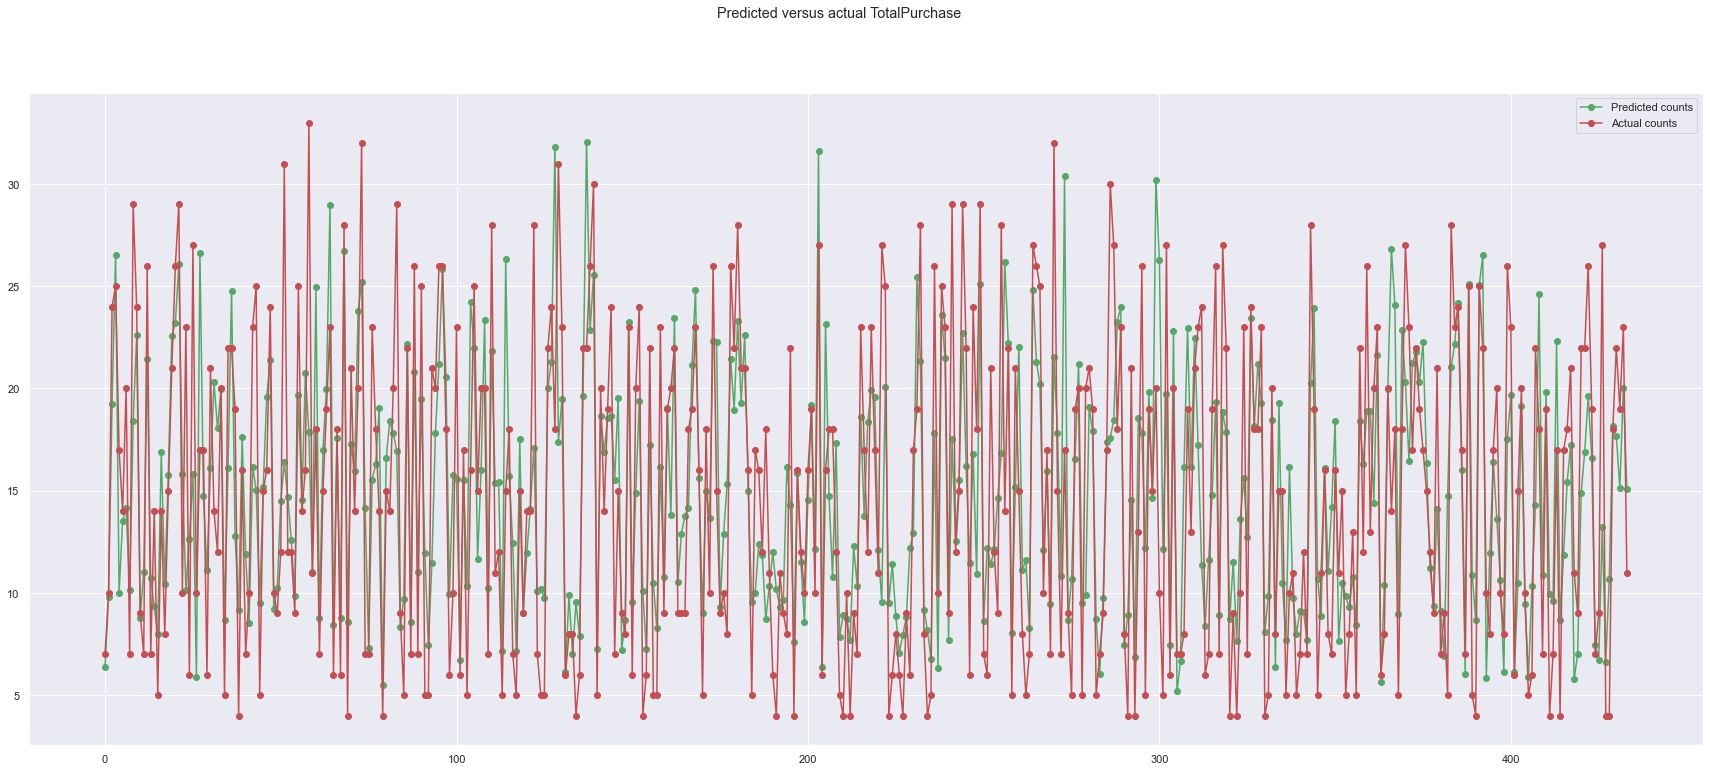

In [54]:
from patsy import dmatrices
import statsmodels.api as sm

# mask = np.random.rand(len(customerData)) < 0.8
# TotalPurchase ~ Year_Birth + Education + Marital_Status + Kidhome + Teenhome + Income + Recency + YearRange + HaveChild + Complain
# TotalPurchase ~ Income  + TotalChild + Teenhome + Kidhome + Year_Birth + Marital_Status
expr = """TotalPurchase ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['TotalPurchase']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual TotalPurchase')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

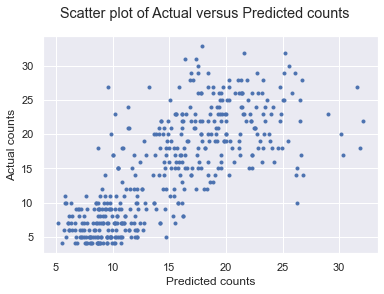

For test data:
Mean Squared Error (MSE) 	: 25.695229218712324
Root Mean Squared Error (RMSE) 	: 5.069046184314395
Explained Variance (R^2) 	: 0.5645233283513676

For train data:
Mean Squared Error (MSE) 	: 26.61135787504366
Root Mean Squared Error (RMSE) 	: 5.158619764534275
Explained Variance (R^2) 	: 0.5319567541027048


In [55]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print("For test data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['TotalPurchase']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

The Poisson Regression works relatively well for predicting TotalPurchase (with an R^2 value of 0.54)

#### The importance of the Income variable: removing Income

In [37]:
expr = """TotalPurchase ~ Education + Marital_Status + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['TotalPurchase']

                 Generalized Linear Model Regression Results                  
Dep. Variable:          TotalPurchase   No. Observations:                 1732
Model:                            GLM   Df Residuals:                     1721
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6696.3
Date:                Fri, 22 Apr 2022   Deviance:                       5780.0
Time:                        13:18:47   Pearson chi2:                 5.78e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Figure size 432x288 with 0 Axes>

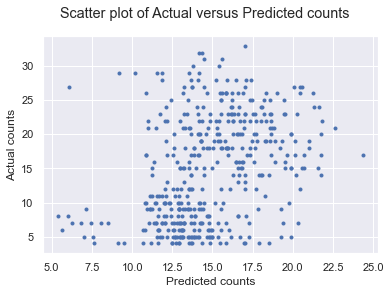

Mean Squared Error (MSE) 	: 51.32549382087912
Root Mean Squared Error (RMSE) 	: 7.164181308487322
Explained Variance (R^2) 	: 0.1298985893712996

For train data:
Mean Squared Error (MSE) 	: 47.33256928203983
Root Mean Squared Error (RMSE) 	: 6.879866952350156
Explained Variance (R^2) 	: 0.16750999827030877


In [38]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['TotalPurchase']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

By removing the income variable, the Poisson Regression performs significantly worse, with an R^2 value of 0.13, making it the best predictor. This pattern can be observd in later models as well.

#### The worse predicting variable: removing Education

In [39]:
expr = """TotalPurchase ~ Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['TotalPurchase']

                 Generalized Linear Model Regression Results                  
Dep. Variable:          TotalPurchase   No. Observations:                 1732
Model:                            GLM   Df Residuals:                     1724
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5365.4
Date:                Fri, 22 Apr 2022   Deviance:                       3118.2
Time:                        13:18:48   Pearson chi2:                 3.11e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Figure size 432x288 with 0 Axes>

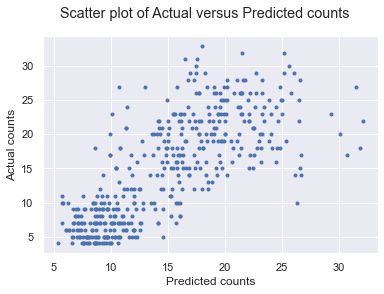

Mean Squared Error (MSE) 	: 25.59242938141953
Root Mean Squared Error (RMSE) 	: 5.058896063512229
Explained Variance (R^2) 	: 0.5662680557253841

For train data:
Mean Squared Error (MSE) 	: 26.67497885685748
Root Mean Squared Error (RMSE) 	: 5.164782556590111
Explained Variance (R^2) 	: 0.5308377818587805


In [40]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['TotalPurchase']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

By repeatedly removing and comparing variables, we found out that the Education variable is the 'worst' predictor. However, the change in R^2 value is not significant

###  <a name="MntGroceryProducts"></a>2. Predicting MntGroceryProducts

                 Generalized Linear Model Regression Results                  
Dep. Variable:     MntGroceryProducts   No. Observations:                 1732
Model:                            GLM   Df Residuals:                     1720
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68592.
Date:                Fri, 22 Apr 2022   Deviance:                   1.2625e+05
Time:                        13:18:48   Pearson chi2:                 1.33e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

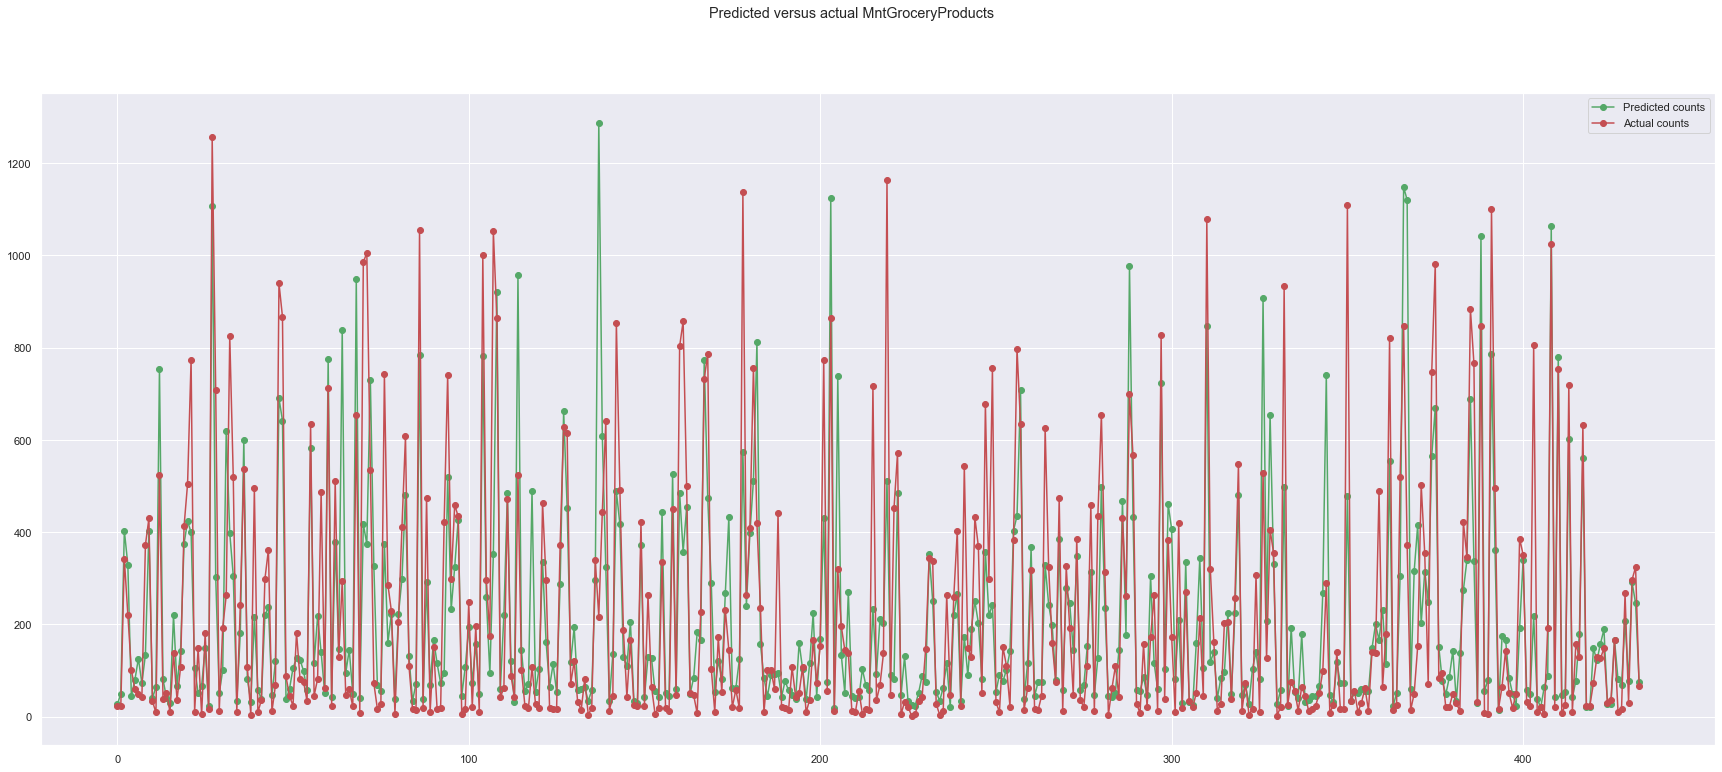

In [41]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """MntGroceryProducts ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntGroceryProducts']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual MntGroceryProducts')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

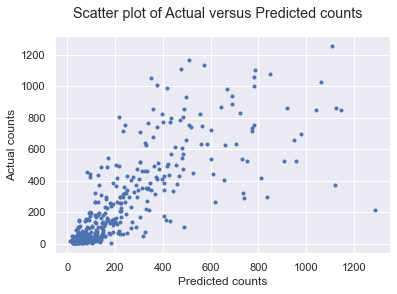

Mean Squared Error (MSE) 	: 29903.78781464956
Root Mean Squared Error (RMSE) 	: 172.92711705990348
Explained Variance (R^2) 	: 0.6201379401197997

For train data:
Mean Squared Error (MSE) 	: 23932.36313597888
Root Mean Squared Error (RMSE) 	: 154.70088278991454
Explained Variance (R^2) 	: 0.6840355426363078


In [42]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['MntGroceryProducts']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))


The Poisson Regression model works even better in predicting MntGroceryProducts, with a relatively high R^2 value of 0.66

#### The worst predicting variables: (All variables except Income perform somewhat equally well)

In [43]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """MntGroceryProducts ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth """

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntGroceryProducts']

                 Generalized Linear Model Regression Results                  
Dep. Variable:     MntGroceryProducts   No. Observations:                 1732
Model:                            GLM   Df Residuals:                     1721
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68618.
Date:                Fri, 22 Apr 2022   Deviance:                   1.2630e+05
Time:                        13:18:49   Pearson chi2:                 1.33e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Figure size 432x288 with 0 Axes>

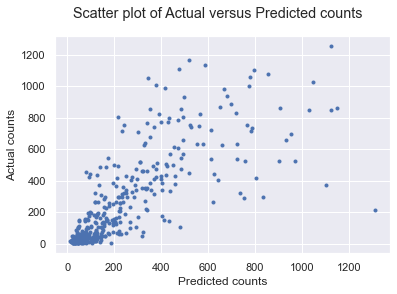

Mean Squared Error (MSE) 	: 29870.711600188708
Root Mean Squared Error (RMSE) 	: 172.8314543137004
Explained Variance (R^2) 	: 0.6205908745964905

For train data:
Mean Squared Error (MSE) 	: 23946.59329783672
Root Mean Squared Error (RMSE) 	: 154.74686845890201
Explained Variance (R^2) 	: 0.6838476704506795


In [44]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['MntGroceryProducts']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

Similar to the previous model, none of the variables affect the model significantly except Income

### <a name="MntWines"></a>3. Predicting MntWines

                 Generalized Linear Model Regression Results                  
Dep. Variable:               MntWines   No. Observations:                 1732
Model:                            GLM   Df Residuals:                     1720
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0013e+05
Date:                Fri, 22 Apr 2022   Deviance:                   1.8906e+05
Time:                        13:18:50   Pearson chi2:                 1.89e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

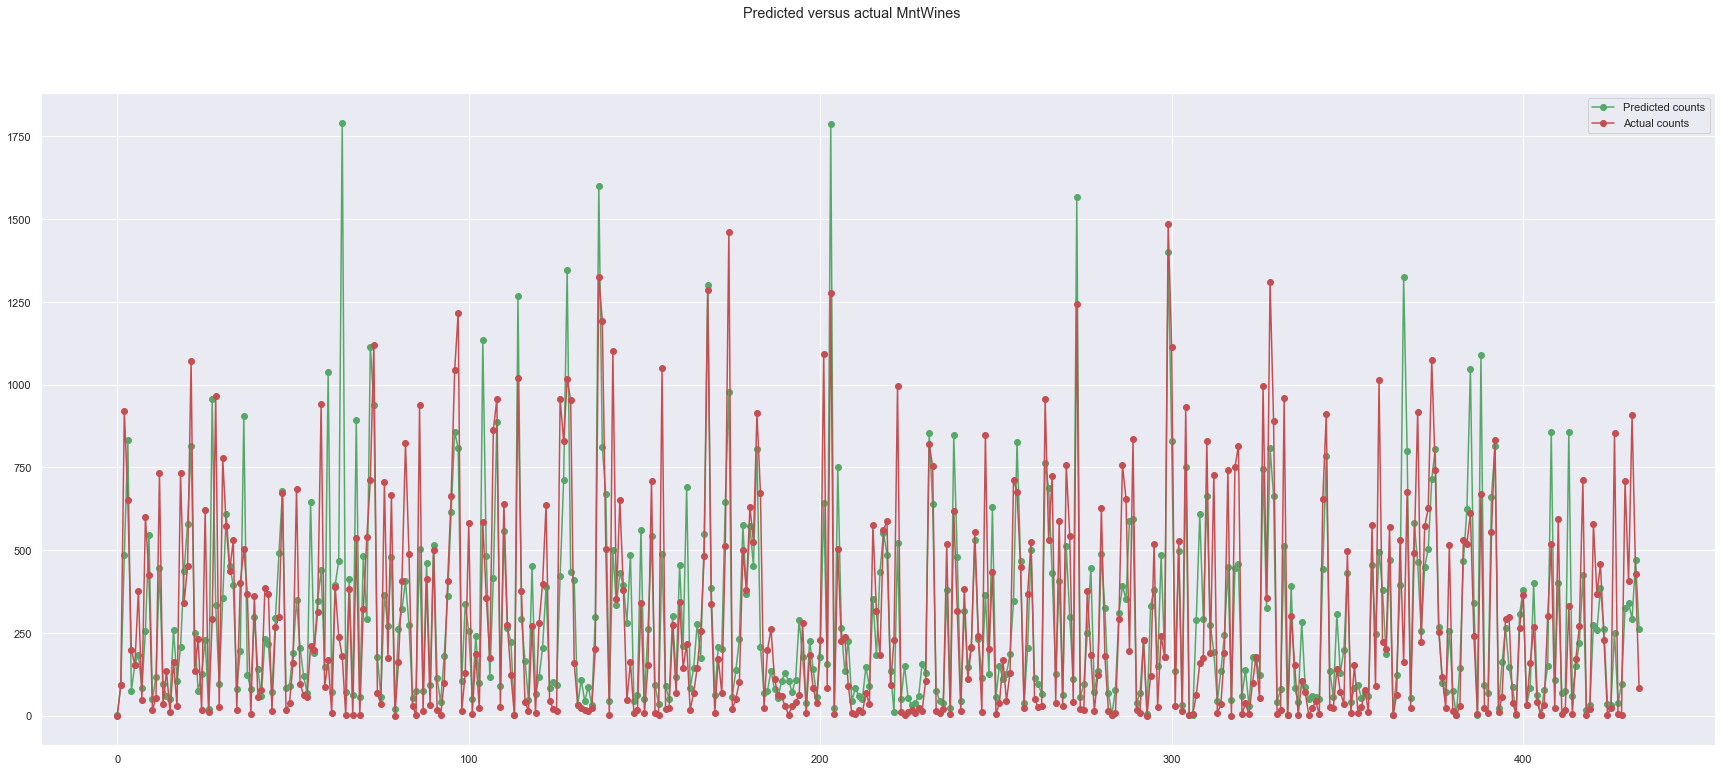

In [45]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """MntWines ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntWines']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual MntWines')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

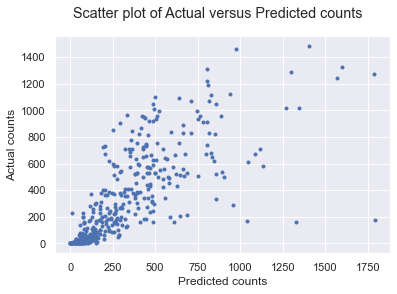

Mean Squared Error (MSE) 	: 47663.6926595992
Root Mean Squared Error (RMSE) 	: 218.32016090961272
Explained Variance (R^2) 	: 0.5767395740925353

For train data:
Mean Squared Error (MSE) 	: 49640.501603713885
Root Mean Squared Error (RMSE) 	: 222.80148474306424
Explained Variance (R^2) 	: 0.5625558666770119


In [46]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['MntWines']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

For predicting MntWines, the model performs somewhat as well as predicting TotalPurchase, though the model might improve if the outlier is removed (where the predicted value of 3000+ is much higher than the actual value)

#### The worse predicting variable: Education, Marital_Status, HaveChild (not a lot tho)

In [47]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """MntWines ~ Income + TotalChild + NumWebVisitsMonth """

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntWines']

                 Generalized Linear Model Regression Results                  
Dep. Variable:               MntWines   No. Observations:                 1732
Model:                            GLM   Df Residuals:                     1728
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1122e+05
Date:                Fri, 22 Apr 2022   Deviance:                   2.1124e+05
Time:                        13:18:50   Pearson chi2:                 2.13e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6002      0.01

<Figure size 432x288 with 0 Axes>

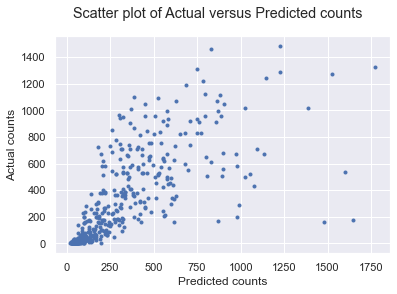

Mean Squared Error (MSE) 	: 53961.75242369461
Root Mean Squared Error (RMSE) 	: 232.2966905138655
Explained Variance (R^2) 	: 0.5208109654864529

For train data:
Mean Squared Error (MSE) 	: 54698.12825386984
Root Mean Squared Error (RMSE) 	: 233.87630973202448
Explained Variance (R^2) 	: 0.5179868346331618


In [48]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['MntWines']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

The 'worst' variables for predicting MntWines are Education, Marital_Status, and HaveChild, even though it still is not very significant

### <a name="MntGoldProds"></a>4. Predicting MntGoldProds

                 Generalized Linear Model Regression Results                  
Dep. Variable:           MntGoldProds   No. Observations:                 1732
Model:                            GLM   Df Residuals:                     1720
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32695.
Date:                Fri, 22 Apr 2022   Deviance:                       57023.
Time:                        13:18:51   Pearson chi2:                 6.80e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

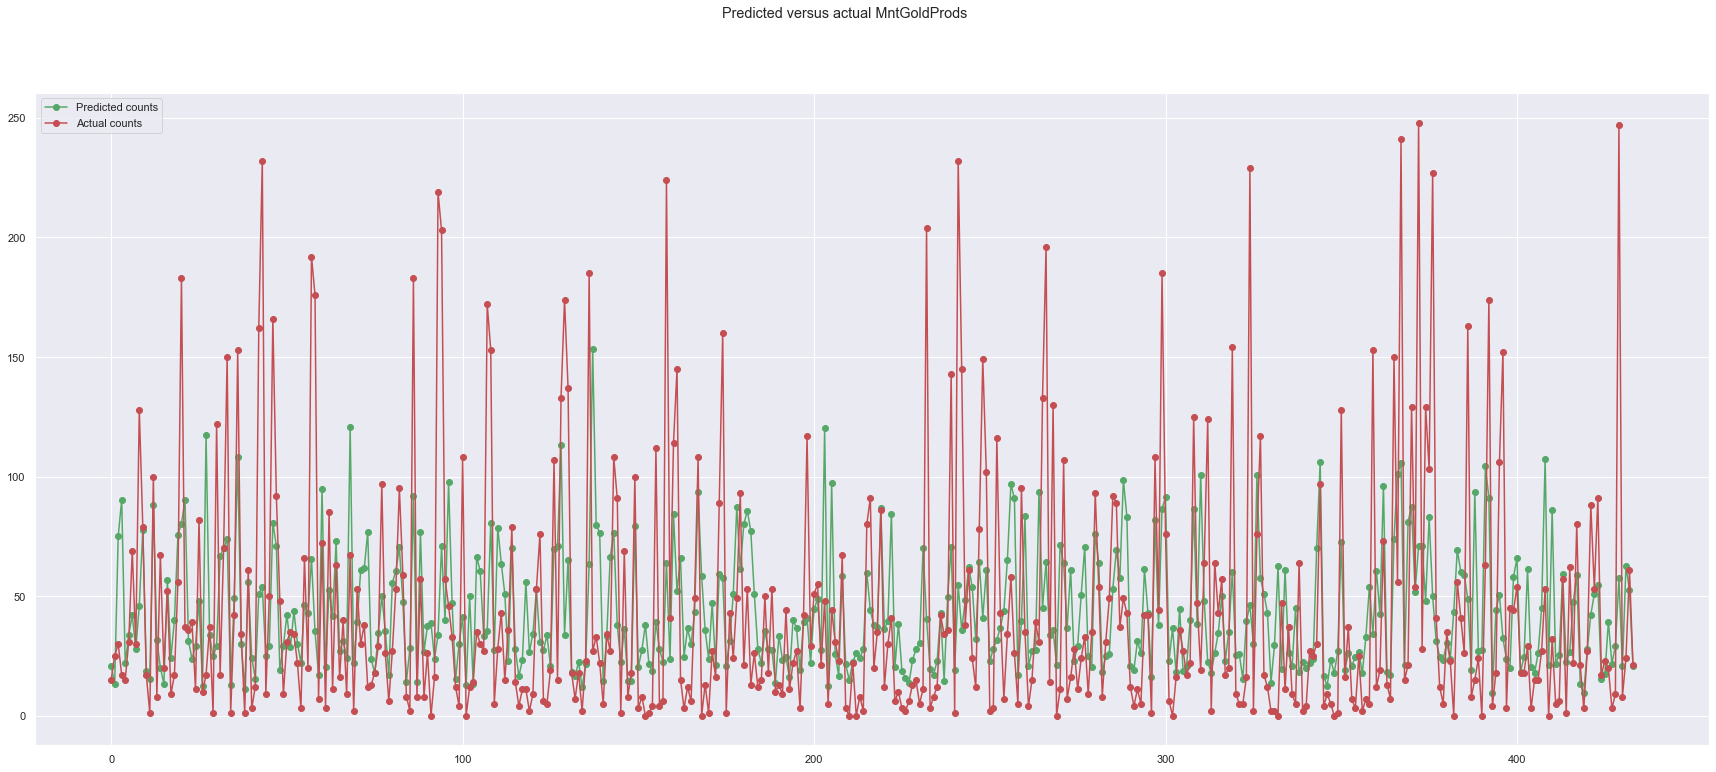

In [49]:
expr = """MntGoldProds ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntGoldProds']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual MntGoldProds')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

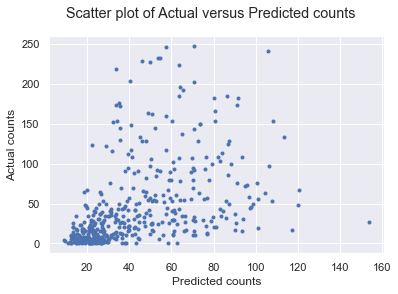

Mean Squared Error (MSE) 	: 2244.138701856828
Root Mean Squared Error (RMSE) 	: 47.37234110593256
Explained Variance (R^2) 	: 0.20173998963660122

For train data:
Mean Squared Error (MSE) 	: 1896.9000582904594
Root Mean Squared Error (RMSE) 	: 43.55341614948774
Explained Variance (R^2) 	: 0.23672963173588868


In [50]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['MntGoldProds']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

Surprisingly, the Poisson Regression model performs the worst in predicting MntGoldProds. 

#### The worse predicting variable: Marital_Status, HaveChild, YearRange (not very significant tho)

In [51]:
expr = """MntGoldProds ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntGoldProds']


                 Generalized Linear Model Regression Results                  
Dep. Variable:           MntGoldProds   No. Observations:                 1732
Model:                            GLM   Df Residuals:                     1720
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32695.
Date:                Fri, 22 Apr 2022   Deviance:                       57023.
Time:                        13:18:52   Pearson chi2:                 6.80e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Figure size 432x288 with 0 Axes>

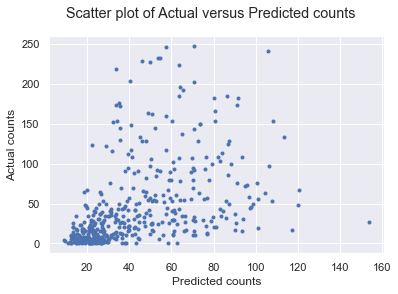

Mean Squared Error (MSE) 	: 2244.138701856828
Root Mean Squared Error (RMSE) 	: 47.37234110593256
Explained Variance (R^2) 	: 0.20173998963660122

For train data:
Mean Squared Error (MSE) 	: 1896.9000582904594
Root Mean Squared Error (RMSE) 	: 43.55341614948774
Explained Variance (R^2) 	: 0.23672963173588868


In [52]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['MntGoldProds']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

### As before, the 'worst' variables are not very significant. Besides that, MntGoldProds is difficult to predict

## Wrap up

With that, we have came to the end of this notebook.  
You can check out our linear regression model, or return back to data-splitting notebook using the link below.

<div style="font-size: 20px;">
<span style = "float: left;"><a href="Data-splitting.ipynb">&lt;- Return to Data-splitting Notebook</a></span>
<span style = "float: right;"><a href="Linear_Regression.ipynb">Linear Regression -></a></span>
</div>

## References:
https://medium.com/lcc-unison/how-to-poisson-regression-model-python-implementation-1c672582eb96  
https://timeseriesreasoning.com/contents/poisson-regression-model/